In [1]:
from tensorflow.keras.datasets import reuters
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [2]:
data = reuters.load_data(num_words = 10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
(x_train, y_train), (x_test, y_test) = data

In [10]:
x_train.shape

(8982,)

In [11]:
x_test.shape

(2246,)

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
x_train = pad_sequences(x_train, maxlen = 256)
x_test = pad_sequences(x_test, maxlen = 256)

In [8]:
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')

In [11]:
model = keras.Sequential([
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(46, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 512, validation_split = 0.2)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.1019 - loss: 1040.4979 - val_accuracy: 0.2359 - val_loss: 478.1300
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2564 - loss: 402.1884 - val_accuracy: 0.2398 - val_loss: 296.8720
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2604 - loss: 248.8512 - val_accuracy: 0.2176 - val_loss: 219.5842
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2529 - loss: 178.1740 - val_accuracy: 0.2326 - val_loss: 173.2231
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2596 - loss: 135.1902 - val_accuracy: 0.2287 - val_loss: 141.0819
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2663 - loss: 110.8362 - val_accuracy: 0.2265 - val_loss: 118.3717
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2755 - loss: 89.2518 - val_accuracy: 0.2154 - val_loss: 102.0192
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2800 - loss: 74.2419 - va

In [13]:
dict_data = history.history

In [14]:
print(dict_data.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [15]:
import matplotlib.pyplot as plt


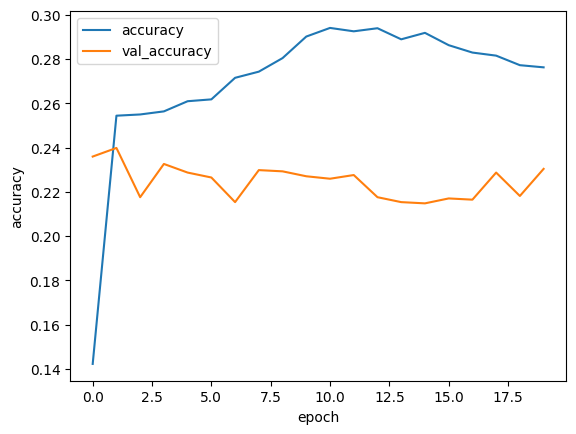

In [16]:
accuracy = dict_data['accuracy']
val_accuracy = dict_data['val_accuracy']
loss = dict_data['loss']
val_loss = dict_data['val_loss']

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

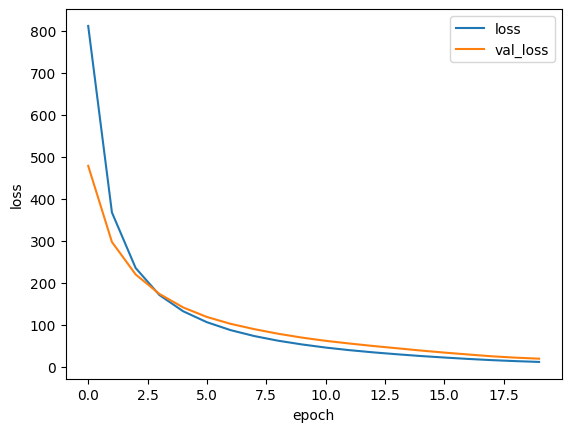

In [17]:
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["loss", "val_loss"])
plt.show()